## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Pressing Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics wth CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation
- a comment placed on a separate line states either the result of the fnext block of code lines or provides some details only for the next line where a more involved operation is encoded

The code is written by Lydia Novozhilova. Senan Hayes contributed to writing text cells and proofreading, editing, and fruitful discussion of this document.

# Lab 3: Simson line
## Problem formulation

Consider a triangle $ABC$ inscribed into the unit circle centered at the origin and a point $P$ on the circle. Make a function that finds the perpendiculars from $P$ to the sides of the triangle (or their extentions) and the Simson line. Plot the triangle, the perpendiculars, and the Simson line in one figure.

For more details regarding this lab refer to Section 3.2.

## Brief description of the notebook contents
### Help functions:

- depending on parameter value, the function **find_line** returns the coefficients of the general equation of line passing through two given points or having given normal vector and passing through a given point.
- **det2**, and **cramer2** include comments that make their actions clear. To use the JN in the case of termination of the function **cramer2**, the user should re-execute all code cells after fixing the input.
- **find_feet** returns a list of coordinates of feet of perpendiculars dropped from the point $P$ onto the sides of the given triangle. It calls help functions needed for the task.
- **my_polygon** takes a list of vertices of a polygon and returns a plot of the polygon. The way the built-in plot function works requires splitting of vertices coordinates into $x$- and $y$-lists.
- **plot_perps** calls help function **find_feet** and **find_line** when needed and plots the prependiculars from P to the sides of the triangle (or its extentions).

The main function **make_figure** includes comments that make its actions clear.

In [ ]:
# Help function: finding equation of line passing through two given points or
# line with given normal passing through given point
import numpy as np

def find_line(pt,item,param):
  """
  Args:
    pt: point on the line (list of length 2)
    item: list of length 2
    param: parameter that takes value 1 if item is the second point on the line;
    any other value indicates that item is a normal vector to the line
  Output:
    List [a,b,c] of the coefficients of line equation ax+by=c
  """
  if param==1:
    n=[item[1]-pt[1],?] # encode second coordinate of normal vector
  else:
    n=item
  return [n[0],n[1],?] # encode coefficient c of the line equation


In [ ]:
# Example
find_line([1,1],[2,-3],1)


[-4, -1, -5]

Manual check: equation of line passing through points $[1,1],\,[2,-3]$:
$$y=1-\frac{-3-1}{2-1}(x-1)\Rightarrow 4x+y=5.$$

In [ ]:
# two help functions

#Determinant of 2x2 matrix
def det2(p,q):
  """
  Args:
    p,q: first and second rows of 2x2 matrix (each is a list of length 2)
  Output:
    determinant of the matrix
  """
  # complete encoding of determinant
  return p[0]*q[1]-p[1]*?

# Cramer's Rule
def cramer2(coef1,coef2):
  """
  Args:
    coef1, coef2: lists [a_i,b_i,c_i] of coefficients of two lines equations
    a_ix+b_iy=c_i, i=1,2
  Output:
    coordinates [x0,y0] of the intersection of two lines
    (if the system is determinate)
  """
  [p,q,r] =[[coef1[k],coef2[k]] for k in range(3)]
  denom = det2(p,q)
  if denom==0:
    print("The system of linear equations is not determinate.")
    quit() # termination of the program
  xdet = det2(?,?) # complete encoding of determinant
  ydet = det2(?,?) # complete encoding of determinant
  return [xdet/denom,ydet/denom]

In [ ]:
# Example
cramer2([4,1,5],[1,-1,2])
# Manual calculation confirms the result.

[1.4, -0.6]

In [ ]:
# Help function: The feet of three perpendiculars

def find_feet(pts):
  """
  Args:
    pts: list of points P,A,B,C coordinates (in this order)
  Output:
    list of three feet coordinates
  """
  # separating vertices of triangle from pts (pts[0] are coordinates of P)
  verts = pts[1:4] # vertices of triangle
  verts.append(verts[0]) # trick to simplify coding side equations
  # Creating list of feet coordinates
  feet = []
  for k in range(3):
    # coefficients of side equation
    side = find_line(verts[?],verts[k+1],1) # complete coding

    # coefficients of perpendicular from P to side
    ortho = find_line(pts[0],[?,?],0) # encode normal to perpendicular from P to side
    foot = cramer2(side,ortho)
    feet.append(foot)
  return feet


In [ ]:
# Example. Argument values correspond to polar angles in the last example of this JN.
# The next code cell shows how coordinates of one of the points (P) are found.
test=find_feet([[0.73, 0.68], [-0.5, 0.86], [-0.21, -0.98], [0.96, -0.28]])
[[round(q[0],3),round(q[1],3)] for q in test]


[[-0.443, 0.495], [1.214, -0.128], [0.351, 0.195]]

In [ ]:
# The polar angle for P in the last example is 0.75.
# Cartesian coordinates of P rounded to two decimals are
np.round(np.cos(0.75),decimals=2), np.round(np.sin(0.75),decimals=2)

(0.73, 0.68)

In [ ]:
# Help function: plotting polygon with any number of verticies
import matplotlib.pyplot as plt

def my_polygon(pts,c):
  """
  Args:
    pts: list of polygon vertices coordinates
    c: color (string)
  Output:
    polygon plot
  """
  pts.append(pts[0]) # appending first vertex to pts for closing polygon
  x,y =[[p[0] for p in pts],[? for p in ?]] # complete encoding of y-coordinates
  plt.plot(x,y, color=c)


In [ ]:
# Plot of a circle of radius r centered at the origin using polar coordinates

def my_circle(r):
  theta = np.linspace(0, 2*np.pi, 100)
  x = r*np.cos(theta)
  y = ? # complete encoding of y-coordinates
  plt.axis('equal')
  plt.plot(x,y)


In [ ]:
# Help function: Plot perpendiculars

def plot_perps(pts,c):
  """
  Args:
    pts: list of coordinates of points P, A, B, C (in this order)
    c: color (string)
  Output:
    feet plot
  """
  feet = find_feet(pts)
  for k in range(3):
    # complete encoding of end points of kth perpendicular
    plt.plot([pts[?][0],feet[k][0]],[pts[0][?],feet[?][1]],color=c,linestyle='--')
  plt.show()


In [ ]:
# Main function: Making the required figure

def make_figure(T,ttl,fig_size):
  """
  Args:
    T: List of four floats --  polar angles that define the vertices [cos(T[i]),sin(T[i])],
    i=1,2,3, and point P([c(T[0]),s(T[0])]);
    ttl: title (string)
    fig_size: 2-tuple (m,n) of positive numbers
  Output:
    Required figure
  """
  fig = plt.figure(figsize = fig_size)
  plt.title(ttl)
  # coordinates of four points
  pts = [[np.?(T[k]),np.sin(T[k])] for k in range(?)] # fill in the blanks

  # plot Simson line
  feet = find_feet(pts)
  my_polygon(feet,'green')

  # plot feet
  x,y =[p[0] for p in feet],[p[?] for p in feet] # fill in the blank
  plt.scatter(x, y,color='red')
  # plot point P
  plt.scatter(pts[0][0], ?,color='red') # encode y-coordinate of point P


  # plot triangle and unit circle
  verts = pts[1:4]
  my_polygon(verts,'blue')
  my_circle(?) # fill in the blank

  plot_perps(pts,'brown') # plot perpendiculars
  plt.show()



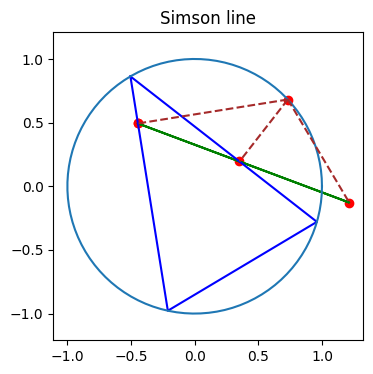

In [ ]:
# Example
make_figure([0.75,2.1,4.5,6.0],'Simson line',(4,4))
